# The idea is to build a model that can generate predictions for future housing prices in for Kings County CA using below regression techniques:
- Linear Regression
- Ridge Regression
- Ridge Regression with Cross Validation
- Gradient Boost Regression

Loading the dataset into dataframe

In [283]:
df = pd.read_csv("kc_house_data.csv", sep=',')

In [284]:
df.head(100)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [285]:
df_bak=df.copy()

In [286]:
print("Check for Cleaning of Data There are no null values in the current dataset")

Check for Cleaning of Data There are no null values in the current dataset


In [287]:
df_bak.isnull().sum()


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [288]:
print("Calculating general mean values")
df_bak.describe()

Calculating general mean values


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [289]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


Below Regression plot of price with respect to square fit living area shows that the prices are somewhat linear to the square fit living

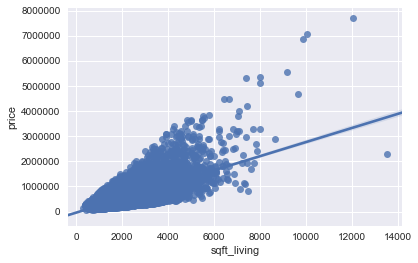

In [290]:
sns.regplot(x="sqft_living", y="price", data=df)

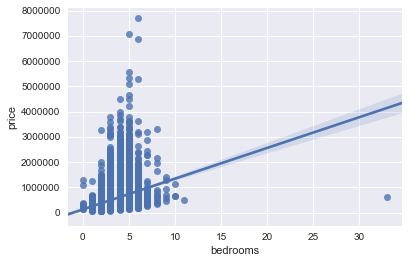

In [291]:
sns.regplot(x="bedrooms", y="price", data=df)

Square fir living are for a 33 bedroom flat is very less which represents it as a false value hence we'll remove it in the next step

In [292]:
df.loc[df['bedrooms'] > 25]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [293]:
df=df.drop(df.index[[15870]])

In [294]:
df.loc[df['bedrooms'] > 25]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


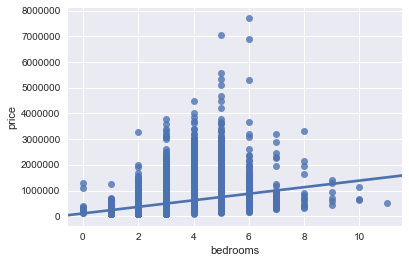

In [295]:
sns.regplot(x="bedrooms", y="price", data=df)

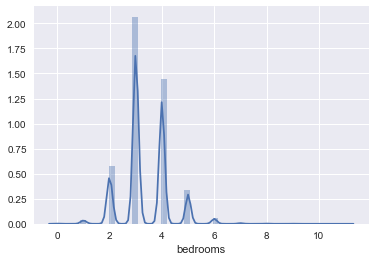

In [296]:
sns.distplot(df['bedrooms']);

In [297]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 4.021680
Kurtosis: 34.521167


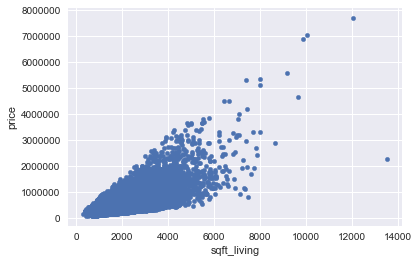

In [298]:
var = 'sqft_living'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price');

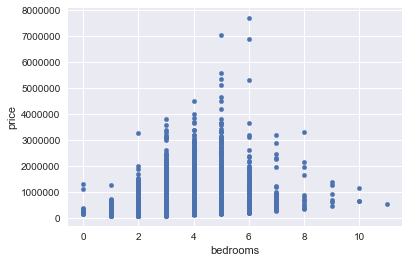

In [299]:
var = 'bedrooms'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price');

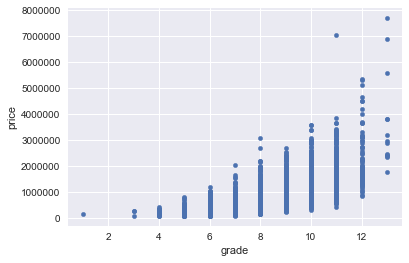

In [300]:
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price');

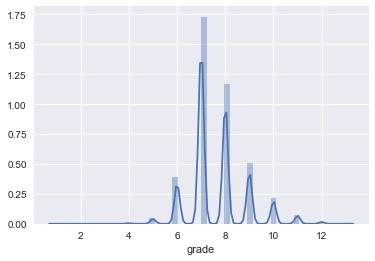

In [301]:
sns.distplot(df['grade']);

{'boxes': [<matplotlib.patches.PathPatch at 0x1e2bf898>],
 'caps': [<matplotlib.lines.Line2D at 0x1e2c7ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e398a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e391b70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1e2bfe48>,
  <matplotlib.lines.Line2D at 0x1e2c7898>]}

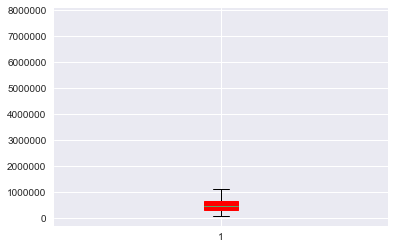

In [302]:
c="red"
plt.boxplot(df['price'],widths=(0.1),patch_artist=True,
            boxprops=dict(facecolor=c, color=c))

In [303]:
df['price'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      75000.0
0.1     245000.0
0.2     298460.0
0.3     345000.0
0.4     399500.0
0.5     450000.0
0.6     518800.0
0.7     595000.0
0.8     700144.0
0.9     887000.0
1.0    7700000.0
Name: price, dtype: float64

In [304]:
df.loc[df['price'] > 150000.0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [305]:
df.count()

price            21612
bedrooms         21612
bathrooms        21612
sqft_living      21612
sqft_lot         21612
floors           21612
waterfront       21612
view             21612
condition        21612
grade            21612
sqft_above       21612
sqft_basement    21612
yr_built         21612
yr_renovated     21612
zipcode          21612
lat              21612
long             21612
sqft_living15    21612
sqft_lot15       21612
dtype: int64

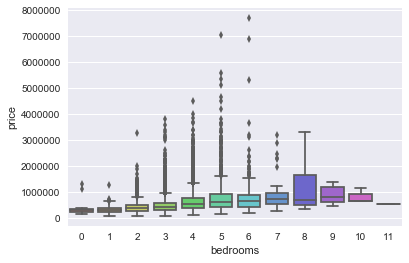

In [306]:
sns.boxplot(x='bedrooms',y='price',data=df,palette='hls')

Drawing general corelation plot to identify the correaltion between dependent variable Price and othe independent variable of dataset


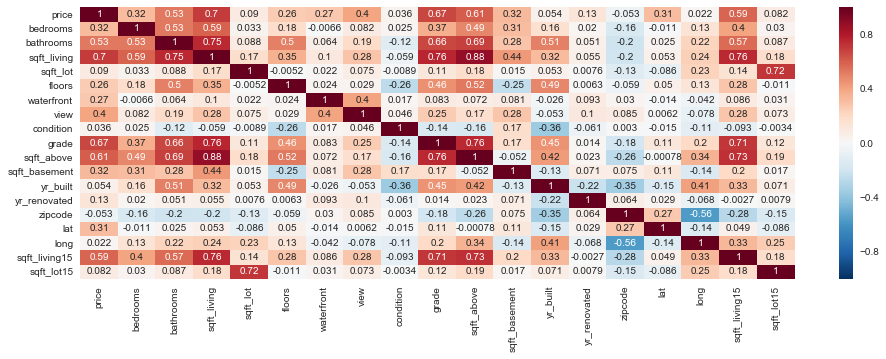

In [307]:
print("Drawing general corelation plot to identify the correaltion between dependent variable Price and othe independent variable of dataset")
corr=df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr,annot=True)

price to sqft_living corr=0.7 and p=0


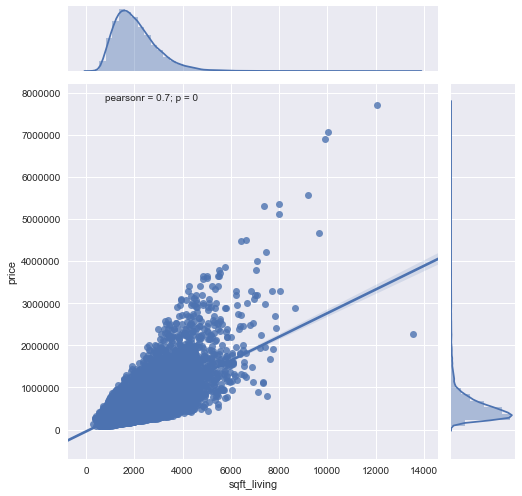

In [308]:
print("price to sqft_living corr=0.7 and p=0")
sns.jointplot(x="sqft_living", y="price", data=df, kind = 'reg', size = 7)
plt.show()

price to sqft_lot corr=0.61 (Which is good) and p=0


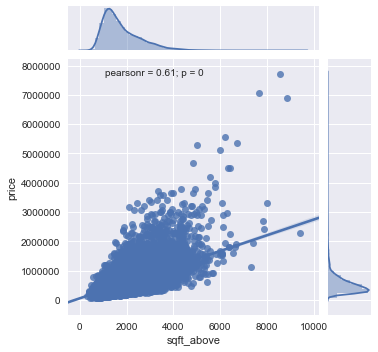

In [309]:
print("price to sqft_lot corr=0.61 (Which is good) and p=0")
sns.jointplot(x="sqft_above", y="price", data=df_bak, kind = 'reg', size = 5)

Calculating variance inflation factor to determine if the highly corelated varibale to price can be used for regression which are highly dependent on each other.By seeing below the vif score which is less than 5 for consdidered columns, then we can assume that thes variables can be considered for regression.

In [310]:
y, X = dmatrices('price ~' + 'sqft_living + sqft_above+ grade ', df_bak, return_type='dataframe')

In [311]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [312]:
'By seeing below the vif score which less than 5 for consdidered columns then we can assume that tehse variable are independent of each other'
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,64.1,Intercept
1,4.8,sqft_living
2,4.7,sqft_above
3,2.6,grade


In [313]:
#Dividing Data Into train and test
train=df.sample(frac=0.8,random_state=200)
test = df.drop(train.index)
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10013,491000.0,3,1.75,1440,7800,1.0,0,0,4,7,1440,0,1958,0,98008,47.5996,-122.120,1440,7800
11774,232000.0,3,1.50,1460,15000,1.0,0,0,3,7,1460,0,1966,0,98001,47.3182,-122.271,1510,15000
10555,729000.0,3,4.25,3300,308080,2.0,0,2,4,9,2520,780,1976,0,98070,47.3979,-122.416,2130,90604
4828,404000.0,4,3.00,4060,35621,1.0,0,0,3,9,2030,2030,1989,0,98092,47.3059,-122.108,2950,35259
3502,389000.0,2,1.00,850,3276,1.0,0,0,3,6,850,0,1910,0,98103,47.6742,-122.350,1460,4100


Tried to incerease the number of parameters of highly co related independent varibale to see if it increase the r squared value. There was only slight change in the r square value so the 4 most significant value was taken under consideration.

In [314]:
X=train[['sqft_living']]
y=train[['price']]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-50696.19281653] [[ 284.91423279]]


In [315]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 8.888e+04
Date:                Fri, 02 Feb 2018   Prob (F-statistic):               0.00
Time:                        23:40:57   Log-Likelihood:            -2.4045e+05
No. Observations:               17290   AIC:                         4.809e+05
Df Residuals:                   17289   BIC:                         4.809e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   264.5203      0.887    298.122      0.000     262.781     266.259
==============================================================================
Omnibus:                    13280.637   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637955.593
Skew:                           3.261   Prob(JB):                         0.00
Kurtosis:                      32.034   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
X=train[['sqft_living','sqft_above']]
y=train[['price']]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-46778.94854966] [[ 305.06050455  -25.6429169 ]]


In [317]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 4.457e+04
Date:                Fri, 02 Feb 2018   Prob (F-statistic):               0.00
Time:                        23:40:57   Log-Likelihood:            -2.4042e+05
No. Observations:               17290   AIC:                         4.809e+05
Df Residuals:                   17288   BIC:                         4.809e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   292.3732      4.321     67.658      0.000     283.903     300.843
sqft_above    -32.8804      4.993     -6.585      0.000     -42.667     -23.094
==============================================================================
Omnibus:                    13093.861   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           612253.280
Skew:                           3.198   Prob(JB):                         0.00
Kurtosis:                      31.442   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
X=train[['sqft_living','sqft_above','grade','bathrooms']]
y=train[['price']]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-648826.54433119] [[  2.60948691e+02  -8.22252377e+01   1.13380898e+05  -3.46814899e+04]]


In [319]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 2.242e+04
Date:                Fri, 02 Feb 2018   Prob (F-statistic):               0.00
Time:                        23:40:57   Log-Likelihood:            -2.4038e+05
No. Observations:               17290   AIC:                         4.808e+05
Df Residuals:                   17286   BIC:                         4.808e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   303.4352      5.059     59.985      0.000     293.520     313.350
sqft_above    -36.0989      5.122     -7.048      0.000     -46.138     -26.060
grade        7980.3821   1029.654      7.751      0.000    5962.157    9998.607
bathrooms   -3.579e+04   4085.934     -8.759      0.000   -4.38e+04   -2.78e+04
==============================================================================
Omnibus:                    13492.960   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           682011.374
Skew:                           3.326   Prob(JB):                         0.00
Kurtosis:                      33.041   Cond. No.                     6.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [320]:
x_test=test[['sqft_living','sqft_above','grade','bathrooms']]
ypred = results.predict(x_test)
y_test=test['price']
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
rmse/y_actual.mean()*100

46.453515713580472

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

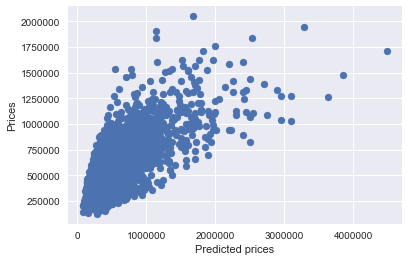

In [321]:
plt.scatter(test['price'],ypred)
plt.xlabel("Predicted prices")
plt.ylabel("Prices")
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X,y)

Ridge Regression is a remedial measure taken to alleviate multicollinearity amongst regression predictor variables in a model. Often predictor variables used in a regression are highly correlated, which is being the case in our dataset. Ridge regression adds a small bias factor to the variables in order to alleviate this problem.

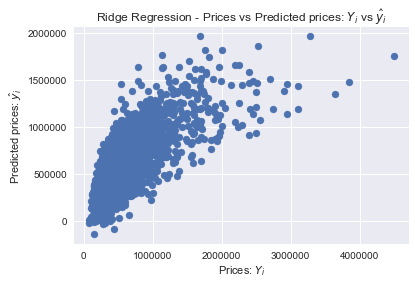

In [322]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X,y)
y_pred_ridge = ridge.predict(x_test)

plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Ridge Regression - Prices vs Predicted prices: $Y_i$ vs $\hat{y}_i$")

In [323]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
rmse/y_test.mean()

0.43891256626889702

Ridge regression with cross validation and random alpha values:

In [324]:
#By using ridge regression with varrying alpha values we  can see that rsmse has been reduced more 
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, x_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60,80,100,120])
ridge.fit(X, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean()/y.mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean()/y_test.mean())
y_train_rdg = ridge.predict(X)
y_test_rdg = ridge.predict(x_test)

Best alpha : 30.0
Try again for more precision with alphas centered around 30.0
Best alpha : 18.0
Ridge RMSE on Training set : price    0.463851
dtype: float64
Ridge RMSE on Test set : 0.436591234619


In [325]:
labels = df['price']
train1 = df.drop(['price'],axis=1)
train1.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


- Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models

In [326]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

- we define our gradient boosting regressor and set parameters to it
- n_estimator — The number of boosting stages to perform. We should not set it too high which would overfit our model.

- max_depth — The depth of the tree node.

- learning_rate — Rate of learning the data.

- loss — loss function to be optimized. ‘ls’ refers to least squares regression

- minimum sample split — Number of sample to be split for learning the data



In [327]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [328]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [329]:
clf.score(x_test,y_test)

0.90778001451172752

In [330]:
y_pred_gb=clf.predict(x_test)

In [331]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
rmse/y_actual.mean()*100

19.265627140392031

References:
1. https://onlinecourses.science.psu.edu/stat857/node/155 
2. https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
3. https://www.kaggle.com/

- DataSource: https://www.kaggle.com/harlfoxem/housesalesprediction/data